# 1. Install Dependencies and Setup

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.13.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.3.1
click                        8.1.7
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
dm-


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

C:\Users\vmarq\AppData\Local\Temp\ipykernel_11316\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [102]:
import numpy as np
from matplotlib import pyplot as plt

In [103]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 684 files belonging to 2 classes.


In [104]:
data_iterator = data.as_numpy_iterator()

In [108]:
batch = data_iterator.next()

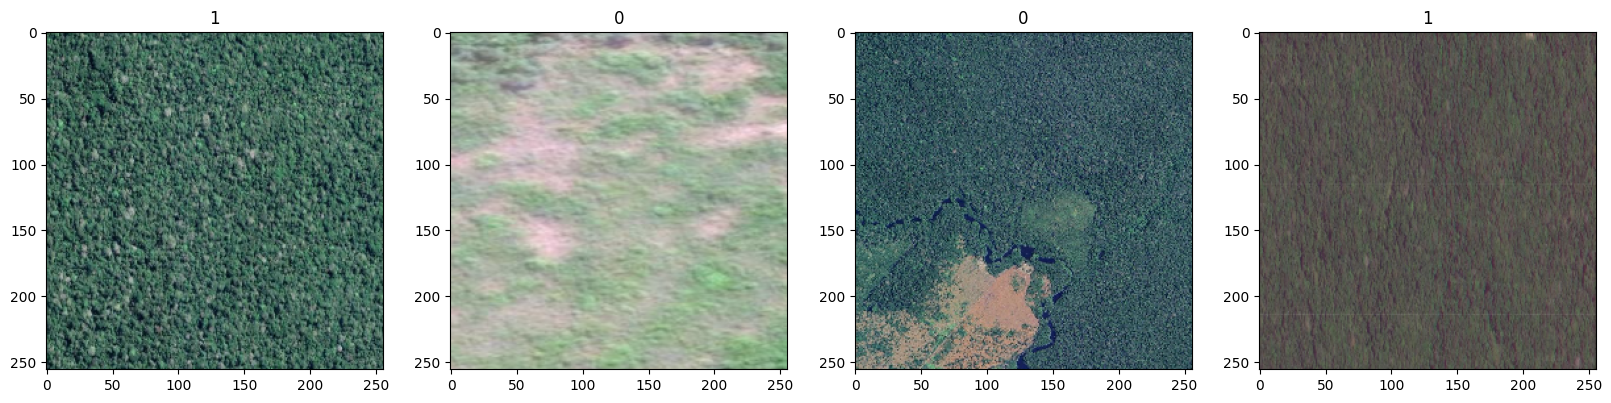

In [109]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [110]:
data = data.map(lambda x,y: (x/255, y))

In [111]:
data.as_numpy_iterator().next()

(array([[[[0.13644695, 0.16067336, 0.188132  ],
          [0.16886471, 0.20099932, 0.23622838],
          [0.17503814, 0.23068321, 0.2541665 ],
          ...,
          [0.08455838, 0.2137749 , 0.14754091],
          [0.13717803, 0.23684102, 0.17263688],
          [0.24593282, 0.3373276 , 0.2844515 ]],
 
         [[0.22611032, 0.23690619, 0.26022112],
          [0.12842344, 0.15244702, 0.17946538],
          [0.18826233, 0.2662116 , 0.25126785],
          ...,
          [0.02661926, 0.1463501 , 0.08384244],
          [0.13793685, 0.23304282, 0.16980356],
          [0.1137445 , 0.22145744, 0.16263391]],
 
         [[0.23484161, 0.23235625, 0.25475973],
          [0.15568006, 0.1752879 , 0.19479257],
          [0.14690909, 0.23620558, 0.19415249],
          ...,
          [0.10516331, 0.22670549, 0.16419783],
          [0.17883642, 0.27160242, 0.20842074],
          [0.06010684, 0.17855032, 0.11518872]],
 
         ...,
 
         [[0.12433334, 0.19082008, 0.15944754],
          [0.09356

# 5. Split Data

In [112]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

In [114]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [132]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [145]:
model = Sequential()

In [146]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 16)       

# 7. Train

In [149]:
logdir='logs'

In [150]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
15/15 [==============================] - 11s 629ms/step - loss: 0.8333 - accuracy: 0.5042 - val_loss: 0.6874 - val_accuracy: 0.4922
Epoch 2/100
15/15 [==============================] - 10s 615ms/step - loss: 0.6806 - accuracy: 0.5437 - val_loss: 0.7201 - val_accuracy: 0.4453
Epoch 3/100
15/15 [==============================] - 10s 622ms/step - loss: 0.6930 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.4922
Epoch 4/100
15/15 [==============================] - 10s 648ms/step - loss: 0.6830 - accuracy: 0.5562 - val_loss: 0.6644 - val_accuracy: 0.7891
Epoch 5/100
15/15 [==============================] - 9s 579ms/step - loss: 0.6280 - accuracy: 0.6667 - val_loss: 0.5711 - val_accuracy: 0.6797
Epoch 6/100
15/15 [==============================] - 9s 599ms/step - loss: 0.6942 - accuracy: 0.6083 - val_loss: 0.7002 - val_accuracy: 0.4766
Epoch 7/100
15/15 [==============================] - 12s 736ms/step - loss: 0.6838 - accuracy: 0.5521 - val_loss: 0.6868 - val_accuracy: 0

# 8. Plot Performance

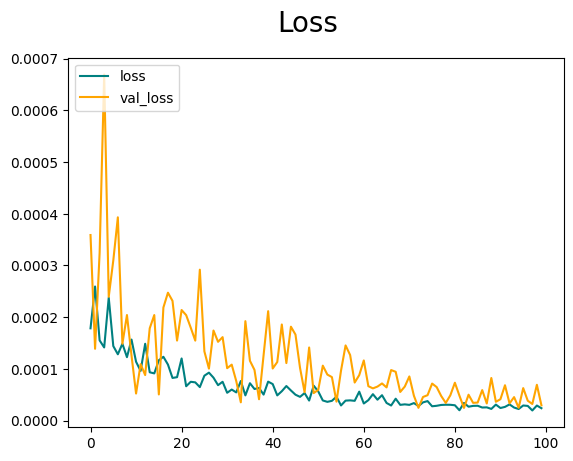

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

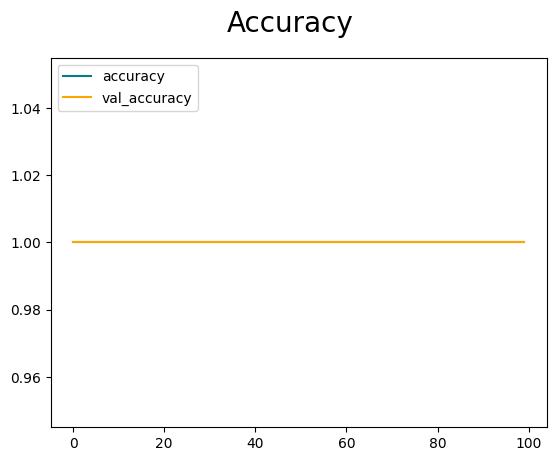

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [80]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [82]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 105ms/step


In [83]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [84]:
import cv2
from matplotlib import pyplot as plt

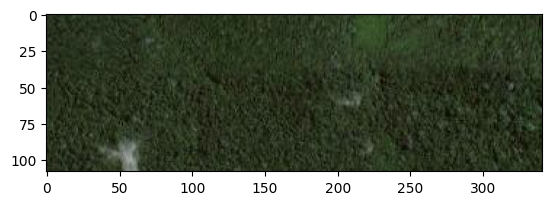

In [93]:
img = cv2.imread('2.png')
plt.imshow(img)
plt.show()

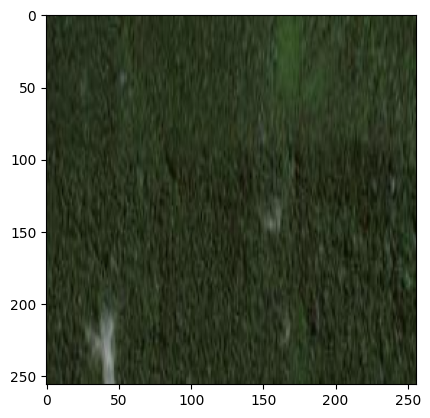

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [96]:
yhat

array([[0.9959224]], dtype=float32)

In [97]:
if yhat > 0.5: 
    print(f'Predicted class is Changed')
else:
    print(f'Predicted class is Natural')

Predicted class is Changed


# 11. Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [60]:
model.save(os.path.join('models','imageclassifier.h5'))

In [62]:
new_model = load_model('models/imageclassifier.h5')

In [63]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


array([[0.94636685]], dtype=float32)